In [1]:
import numpy as np
from scipy.stats import norm

In [2]:
m1_mean = 40 * 10 **4 
m1_dev = 0.05 * 10 **4
m2_mean = 30 * 10 **4 
m2_dev = 0.1 * 10 **4
r_mean = 3.2
r_dev = 0.01
g = 6.67384*10**(-11)

# Part 1
## Using standard deviation rule
### Fractional uncertainties add in quadrature, In practice, it is usually simplest to convert all of the uncertainties into percentages before applying the formula

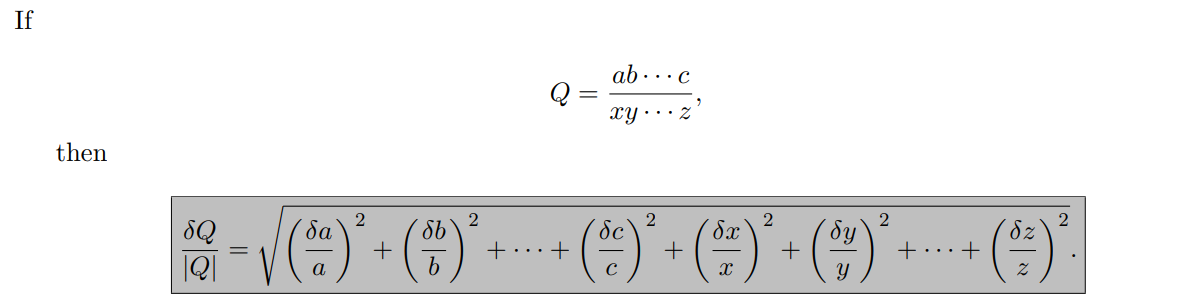

In [3]:
from IPython.display import Image
Image("standard_deviation.png")

In [4]:
f_mean = (g*m1_mean*m2_mean)/(r_mean)**2
fdevonf = np.sqrt((m1_dev/m1_mean)**2 + (m2_dev/m2_mean)**2 + 2*((r_dev/r_mean)**2) + (m2_dev/m2_mean)**2)
f_dev = fdevonf * f_mean
f_dev # error of the value of f
print(f_mean, '+-', f_dev)

0.7820906249999999 +- 0.005147319346085339


## Using a Monte-Carlo technique

In [5]:
st_d_M1 = np.random.randint(-0.05* 10**4, 0.05 * 10**4, size=1000000)
st_d_M2 = np.random.randint(-0.1 * 10**4, 0.1 * 10**4, size=1000000)
st_d_r = np.random.uniform(-0.01, 0.01, size=1000000)

In [6]:
M1 = m1_mean +st_d_M1
M2 = m2_mean +st_d_M2
R = r_mean +st_d_r
g = 6.67384*10**(-11)
m1m2g = M1*g*M2
rr = R**2
F = m1m2g / rr

Text(0.5, 0, 'Force')

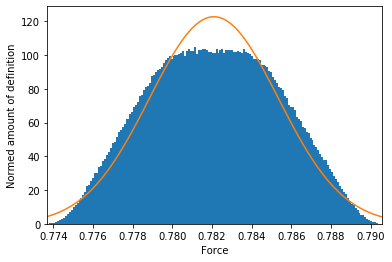

In [9]:
import matplotlib.pyplot as plt
arr = F
plt.figure(1)
plt.hist(arr, density=True, bins='auto')
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
plt.plot(x, norm.pdf(x, mean, sigma))

plt.ylabel('Normed amount of definition')
plt.xlabel('Force')


# Part 2
## Using standard deviation rule

In [10]:
m1_mean_ = 40 * 10 **4 
m1_dev_ = 2 * 10 **4
m2_mean_ = 30 * 10 **4 
m2_dev_ = 10 * 10 **4
r_mean_ = 3.2
r_dev_ = 1

In [11]:
f_mean_ = (g*m1_mean_*m2_mean_)/(r_mean_)**2
fdevonf_ = np.sqrt((m1_dev_/m1_mean_)**2 + (m2_dev_/m2_mean_)**2 + 2*((r_dev_/r_mean_)**2) + (m2_dev_/m2_mean_)**2)
f_dev_ = fdevonf_ * f_mean_
f_dev_ # error of the value of f
print(f_mean_, '+-', f_dev_)

0.7820906249999999 +- 0.5068736051456639


## Using Monte-Carlo technique

In [12]:
st_d_M1_ = np.random.randint(-m1_dev_, m1_dev_ , size=1000000)
st_d_M2_ = np.random.randint(-m2_dev_, m2_dev_, size=1000000)
st_d_r_ = np.random.uniform(-m2_dev_, r_dev_, size=1000000)

In [13]:
M1_ = m1_mean_ + st_d_M1_
M2_ = m2_mean_ + st_d_M2_
R_ = r_mean + st_d_r
g = 6.67384 * 10 **(-11)
m1m2g_ = M1_ * g * M2_
rr_ = R_ ** 2
F_ = m1m2g_ / rr_
F_

array([0.94861266, 0.59259564, 0.72146916, ..., 0.7512117 , 0.55959746,
       0.8936073 ])

Text(0.5, 0, 'Force')

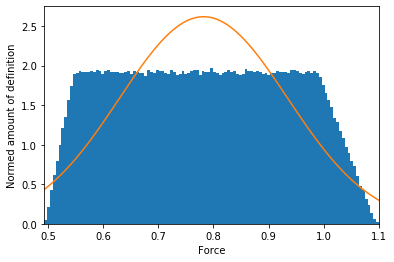

In [14]:
import matplotlib.pyplot as plt
arr_ = F_
plt.figure(2)
plt.hist(arr_, density=True, bins='auto')
plt.xlim((min(arr_), max(arr_)))

mean_ = np.mean(arr_)
variance_ = np.var(arr_)
sigma_ = np.sqrt(variance_)
x_ = np.linspace(min(arr_), max(arr_), 100)
plt.plot(x_, norm.pdf(x_, mean_, sigma_))

plt.ylabel('Normed amount of definition')
plt.xlabel('Force')

### In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique?


Метод Монте-Карло в случае больших погрешностей в измеении величин дает неверный ответ.
Когда погрешность измерений малая, метод Монте-Карло дает хороший результат